In [1]:
!pip install transformers #1
!pip install praw #2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 3.3 MB/s eta 0:00:00


In [2]:
from transformers import TFAutoModelForTokenClassification, AutoTokenizer #3
from matplotlib import pyplot as plt #4
import tensorflow as tf #5
import praw #6
import pandas as pd #7
import wordcloud #8
import numpy as np #9

In [3]:
model = TFAutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english") #10
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased") #11

Some layers from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing TFBertForTokenClassification: ['dropout_147']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


In [4]:
label_list = ["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC",  "I-LOC"] #12

In [5]:
reddit = praw.Reddit(client_id='4sh9jtxWs3u7Ig', #13
                     client_secret='gMr4BiX0dTlJMvWpYDxLYgW6Bgk6eQ', #14
                     user_agent='Jyoshna') #15

In [6]:
def replies_of(top_level_comment, comment_list): #16
    if len(top_level_comment.replies) == 0: #17
        return #18
    else: #19
        for num, comment in enumerate(top_level_comment.replies): #20
            try: #21
                comment_list.append(str(comment.body)) #22
            except: #23
                continue #24
            replies_of(comment, comment_list) #25

In [7]:
count = 0 #26
master_dict = {'I-LOC': [], 'I-ORG': [], 'I-PER': [], 'B-LOC': [], 'B-ORG': [], 'B-PER': []} #27 #BERT recognised tags for its pre trained vocabulary
word_temp = '' #28
current_tag = '' #29
old_tag = '' #30
print_dict = {} #31

In [8]:
list_of_subreddit = ['news'] #32

In [9]:
for j in list_of_subreddit:   #33
    top_posts = reddit.subreddit(j).top('month', limit=1) #34
    comment_list=[] #35
    for submission in top_posts: #36
        submission_comm = reddit.submission(id=submission.id) #37
        print("Title:",submission.title) #38
        print('\n') #39
        comment_list.append(str(submission.title)) #40

        for count, top_level_comment in enumerate(submission_comm.comments): #41
            try: #42
                replies_of(top_level_comment, comment_list) #43
            except: #44
                continue #45
            
print("The Extracted comments are as follows:\n") #46
print(comment_list) #47
print("\nLength of the comment list:\n") #48
print(len(comment_list)) #49

<ipython-input-9-a0aca971e077>:2: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  top_posts = reddit.subreddit(j).top('month', limit=1) #34
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Donald Trump indicted over hush money payments in Stormy Daniels probe


The Extracted comments are as follows:

['Donald Trump indicted over hush money payments in Stormy Daniels probe', 'I love in constant fear', 'I fear in constant love.', 'I love turtles', "You're a great... zombie...", "I mean shit. If campaign money isn't for paying off prostitutes then what's even the point of democracy?", 'Don\'t worry, just repeat after me:\n\n"I misinterpreted the rules"', 'Using personal money, to have his lawyer funnel it through a shell Corp \n\nRudy even called it funnel lmao', 'And claiming it as a business expense, the tax evasion is where the real crime is.', "In Florida and Texas for sure, it'll all be privatized charter schools though", "They'll ban anything that doesn't paint Trump as the Hero of the Age!", "They'll allow it if she's called a hooker, floozy, slut, etc. As long as porn actors are being dragged in it, it'll be ok.", '“Trump broke campaign finance laws” is all i

In [10]:
for sequence in comment_list: #50
    if len(sequence) > 512: #51
        continue #52
    
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence))) #53
    print("\nTokens are as follows:\n") #54
    print(tokens) #55
    inputs = tokenizer.encode(sequence, return_tensors="tf") #56 #coverts token arrays into tensors
    print("\nInputs are as follows:\n") #57
    print(inputs) #58
    outputs = model(inputs)[0] #59
    print("\nOutputs are as follows:\n") #60
    print(outputs) #61
    predictions = tf.argmax(outputs, axis=2) #62


    list_bert = [(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())] #63
    print("\nThis is the list_bert:\n") #64
    print(list_bert) #65


    for i in list_bert: #66
        if i[1] in ['O', 'B-MISC', 'I-MISC']: #67
            # print('in if') 
            if len(current_tag) > 0: #68
                without_space_word = word_temp.strip() #69
                if len(without_space_word) > 1: #70
                    master_dict[current_tag].append(without_space_word) #71
            count = 0 #72
            word_temp = '' #73
            current_tag = '' #74
            continue #75
        else: #76
            current_tag = i[1] #77

            if old_tag != current_tag and len(old_tag) > 0: #78
                without_space_word = word_temp.strip() #79
                if len(without_space_word) > 1: #80
                    master_dict[old_tag].append(without_space_word) #81
                count = 0 #82
                word_temp = '' #83
                current_tag = '' #84

            if i[0].startswith('##'): #85
                word_temp += i[0][2:].upper() #86
            elif i[1] in ['I-PER', 'I-ORG', 'I-LOC', 'B-LOC', 'B-ORG', 'B-PER']: #87
                word_temp += " " + i[0].upper() #88
                current_tag = i[1] #89
                count += 1 #90
            old_tag = current_tag #91

Streaming output truncated to the last 5000 lines.
  [ 1.08034525e+01 -1.98401213e+00  4.13918108e-01 -2.59282064e+00
   -1.37304962e+00 -2.09987569e+00 -5.98440528e-01 -1.94218540e+00
   -5.79960406e-01]
  [ 1.15918102e+01 -2.17821860e+00 -1.40523762e-01 -2.31557250e+00
   -1.85244334e+00 -2.08535123e+00 -7.04997718e-01 -1.77802253e+00
   -7.97789812e-01]
  [ 1.16704578e+01 -2.18397832e+00 -9.18610275e-01 -2.32689786e+00
   -1.53898478e+00 -1.70768023e+00 -7.53955662e-01 -1.68949461e+00
   -4.70860481e-01]
  [ 1.16381712e+01 -2.23041701e+00 -9.96326029e-01 -2.39395332e+00
   -1.61853957e+00 -1.69558382e+00 -2.79731542e-01 -1.81105375e+00
   -6.58912718e-01]
  [ 7.70171940e-01 -1.03905416e+00  2.83064270e+00 -2.65105295e+00
   -1.88451290e+00 -8.25465441e-01  5.26454020e+00 -1.58020091e+00
    3.57562788e-02]
  [ 1.47156060e+00 -1.63206518e+00  1.20282090e+00 -1.98859179e+00
   -1.53278649e+00 -7.02424765e-01  5.99350643e+00 -1.91112638e+00
   -8.93931687e-01]
  [ 1.15637417e+01 -2.053

In [11]:
print("The keywords that we found along with duplication are as follows:\n") #92
print(master_dict) #93
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC'])) #94
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG'])) #95
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER'])) #96

print("\nI-LOC\n") #97
print(master_dict['I-LOC']) #98
print("\nB-LOC\n") #99
print(master_dict['B-LOC']) #100
print("\nI-ORG\n") #101
print(master_dict['I-ORG']) #102
print("\nB-ORG\n") #103
print(master_dict['B-ORG']) #104
print("\nI-PER\n") #105
print(master_dict['I-PER']) #106
print("\nB-PER\n") #107
print(master_dict['B-PER']) #108

The keywords that we found along with duplication are as follows:

{'I-LOC': ['FLORIDA', 'TEXAS', 'AMERICA', 'AMERICA', 'RED SPOT', 'JUPITER', 'USA', 'GA', 'DC', 'AMERICA', 'US', 'GEORGIA', 'MAR - A - LAGO', 'TEXAS', 'UKRAINE', 'WHITE HOUSE', 'CAPITOL', 'EMPIRE STATE BUILDING', 'WHITE HOUSE', 'AMERICA', 'MANHATTAN', 'MAR - A - LAGO', 'VEGAS', 'GEORGIA', 'GEORGIA', 'UKRAINE', 'US', 'US', 'WHITE HOUSE', 'GEORGIA', 'CAPITOL', 'UNITED', 'STATES', 'TURKEY', 'FINLAND', 'AMERICA', 'AMERICA', 'US'], 'I-ORG': ['FOX', 'OANN', 'RW', 'NEWS CORP', 'FOX', '4CHAN', 'NDA', 'KNOWJAX', 'MSNBC', 'LOU', 'VENI VIDI', 'IRS', 'IRS', 'SOUTH PARK', 'NYPD', 'YAR', 'FOX NEWS', 'PECK', 'SS REDDIT', 'DOMINION', 'FOX', 'DOMINION', 'FOX NEWS', 'REGRESSIVES', 'SECRET SERVICE', 'SS', 'NEW YORK PUBLIC LANDSCAPING', 'HOUSE', 'SENATE', 'LIFEDOCTOR', 'NORTH SOCIAL', 'CNN', 'GRAND JURY', 'BABA', 'FOX NEWS', 'SIR', 'DA', 'TRUTH SOCIAL', 'JU', 'MTG', 'KLASFELDR', 'SEASONS', 'YT', 'STONE', 'IMO', 'SECRET SERVICE', 'MAGA', 'VI

In [12]:
print("All keywords without duplication and categorising them into Location, Organization and Person Name\n") #109
print("Location:") #110
print(print_dict['Location']) #111
print("\nOrganisation:") #112
print(print_dict['Organisation']) #113
print("\nPerson Name:") #114
print(print_dict['Person Name']) #115

All keywords without duplication and categorising them into Location, Organization and Person Name

Location:
['GA', 'STATES', 'FLORIDA', 'US', 'MAR - A - LAGO', 'UKRAINE', 'AMERICA', 'WHITE HOUSE', 'DC', 'TEXAS', 'MANHATTAN', 'USA', 'TURKEY', 'JUPITER', 'UNITED', 'VEGAS', 'RED SPOT', 'EMPIRE STATE BUILDING', 'CAPITOL', 'GEORGIA', 'FINLAND']

Organisation:
['OANN', 'KLASFELDR', 'REGRESSIVES', 'NEW YORK PUBLIC LANDSCAPING', 'VENI VIDI', 'HOUSE', 'IMO', 'LOU', 'SS REDDIT', 'DOMINION', 'MTG', 'NATO', 'GRAND JURY', 'NDA', 'SOUTH PARK', 'SIR', 'DA', 'SECRET SERVICE', 'NORTH SOCIAL', 'SS', 'JU', 'IRS', 'RW', '4CHAN', 'KNOWJAX', 'STONE', 'BABA', 'NEWS CORP', 'TRUTH SOCIAL', 'SENATE', 'FOX', 'NYPD', 'LIFEDOCTOR', 'CNN', 'MSNBC', 'YT', 'VID', 'CONGRESS', 'SEASONS', 'PECK', 'GOP', 'MAGA', 'YAR', 'DISNEY', 'FOX NEWS']

Person Name:
['ROMAN REIGN', 'LUCILLE', 'RUDY', 'BIDEN', 'RUDY GIULIANI', '“ TRUMP', 'JACQUIS NEAL', 'HITLER', 'STORM', 'STORMY', 'DONALD TRUMP', 'JOHN MCCAIN', 'WEISSELBERG', 'TRU

In [13]:
keywords = list(master_dict['I-LOC'] + master_dict['B-LOC'] + master_dict['I-ORG'] + master_dict['B-ORG'] + master_dict['I-PER'] + master_dict['B-PER']) #116
result_dict = {} #117

for keyword in keywords: #118
    if keyword not in result_dict: #119
      result_dict[keyword] = 1 #120
    else: #121
      result_dict[keyword] += 1 #122

print("All Keywords with their respective no. of occurrences:\n") #123
print(result_dict) #124

All Keywords with their respective no. of occurrences:

{'FLORIDA': 1, 'TEXAS': 2, 'AMERICA': 6, 'RED SPOT': 1, 'JUPITER': 1, 'USA': 1, 'GA': 1, 'DC': 1, 'US': 4, 'GEORGIA': 4, 'MAR - A - LAGO': 2, 'UKRAINE': 2, 'WHITE HOUSE': 3, 'CAPITOL': 2, 'EMPIRE STATE BUILDING': 1, 'MANHATTAN': 1, 'VEGAS': 1, 'UNITED': 1, 'STATES': 1, 'TURKEY': 1, 'FINLAND': 1, 'FOX': 4, 'OANN': 1, 'RW': 1, 'NEWS CORP': 1, '4CHAN': 1, 'NDA': 1, 'KNOWJAX': 1, 'MSNBC': 1, 'LOU': 1, 'VENI VIDI': 1, 'IRS': 2, 'SOUTH PARK': 1, 'NYPD': 1, 'YAR': 1, 'FOX NEWS': 3, 'PECK': 1, 'SS REDDIT': 1, 'DOMINION': 2, 'REGRESSIVES': 1, 'SECRET SERVICE': 2, 'SS': 1, 'NEW YORK PUBLIC LANDSCAPING': 1, 'HOUSE': 1, 'SENATE': 1, 'LIFEDOCTOR': 1, 'NORTH SOCIAL': 1, 'CNN': 1, 'GRAND JURY': 1, 'BABA': 1, 'SIR': 1, 'DA': 1, 'TRUTH SOCIAL': 1, 'JU': 1, 'MTG': 1, 'KLASFELDR': 1, 'SEASONS': 1, 'YT': 1, 'STONE': 1, 'IMO': 1, 'MAGA': 3, 'VID': 1, 'GOP': 1, 'NATO': 1, 'DISNEY': 1, 'CONGRESS': 1, 'DONALD TRUMP': 7, 'STORM': 1, 'DANIELS': 1, 'RUDY': 

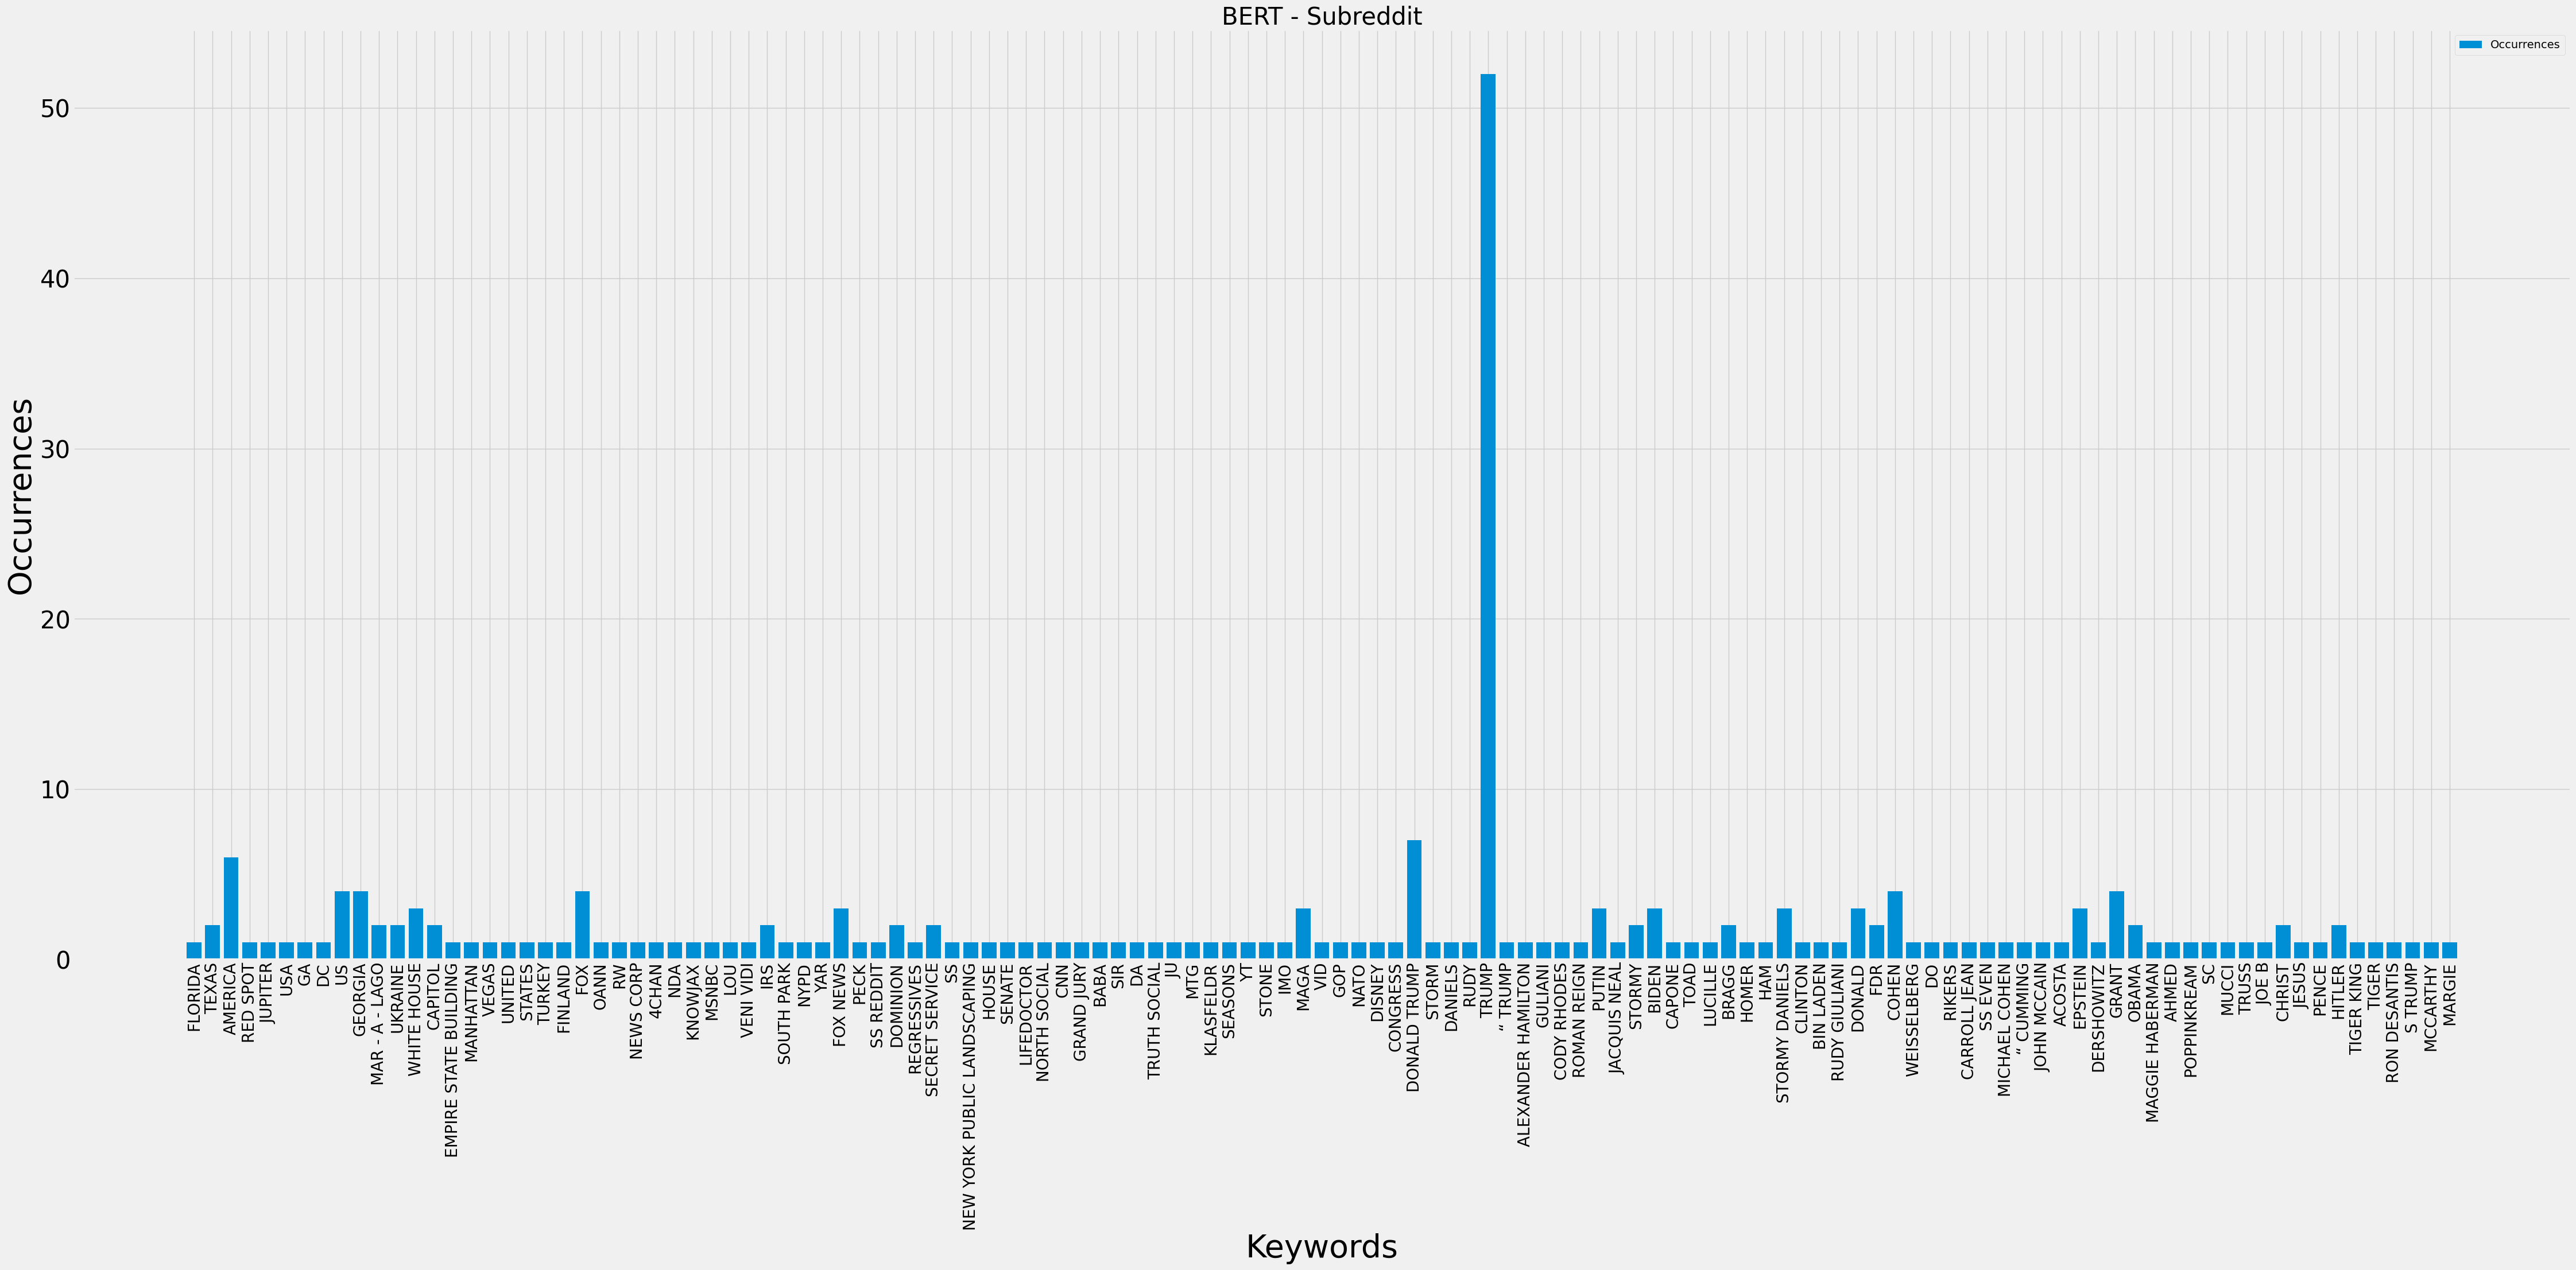

In [14]:
width = 50 #125
height = 20 #126

x_axis = range(len(result_dict)) #127

plt.style.use('fivethirtyeight') #128

plt.figure(figsize=(width,height)) #129
plt.bar(x_axis,list(result_dict.values()),label="Occurrences") #130

plt.xticks(x_axis,list(result_dict.keys()), rotation=90, fontsize=20) #131
plt.yticks(fontsize=30) #132

plt.title("BERT - Subreddit",fontsize=30) #133
plt.xlabel("Keywords",fontsize=40) #134
plt.ylabel("Occurrences",fontsize=40) #135

plt.legend() #136

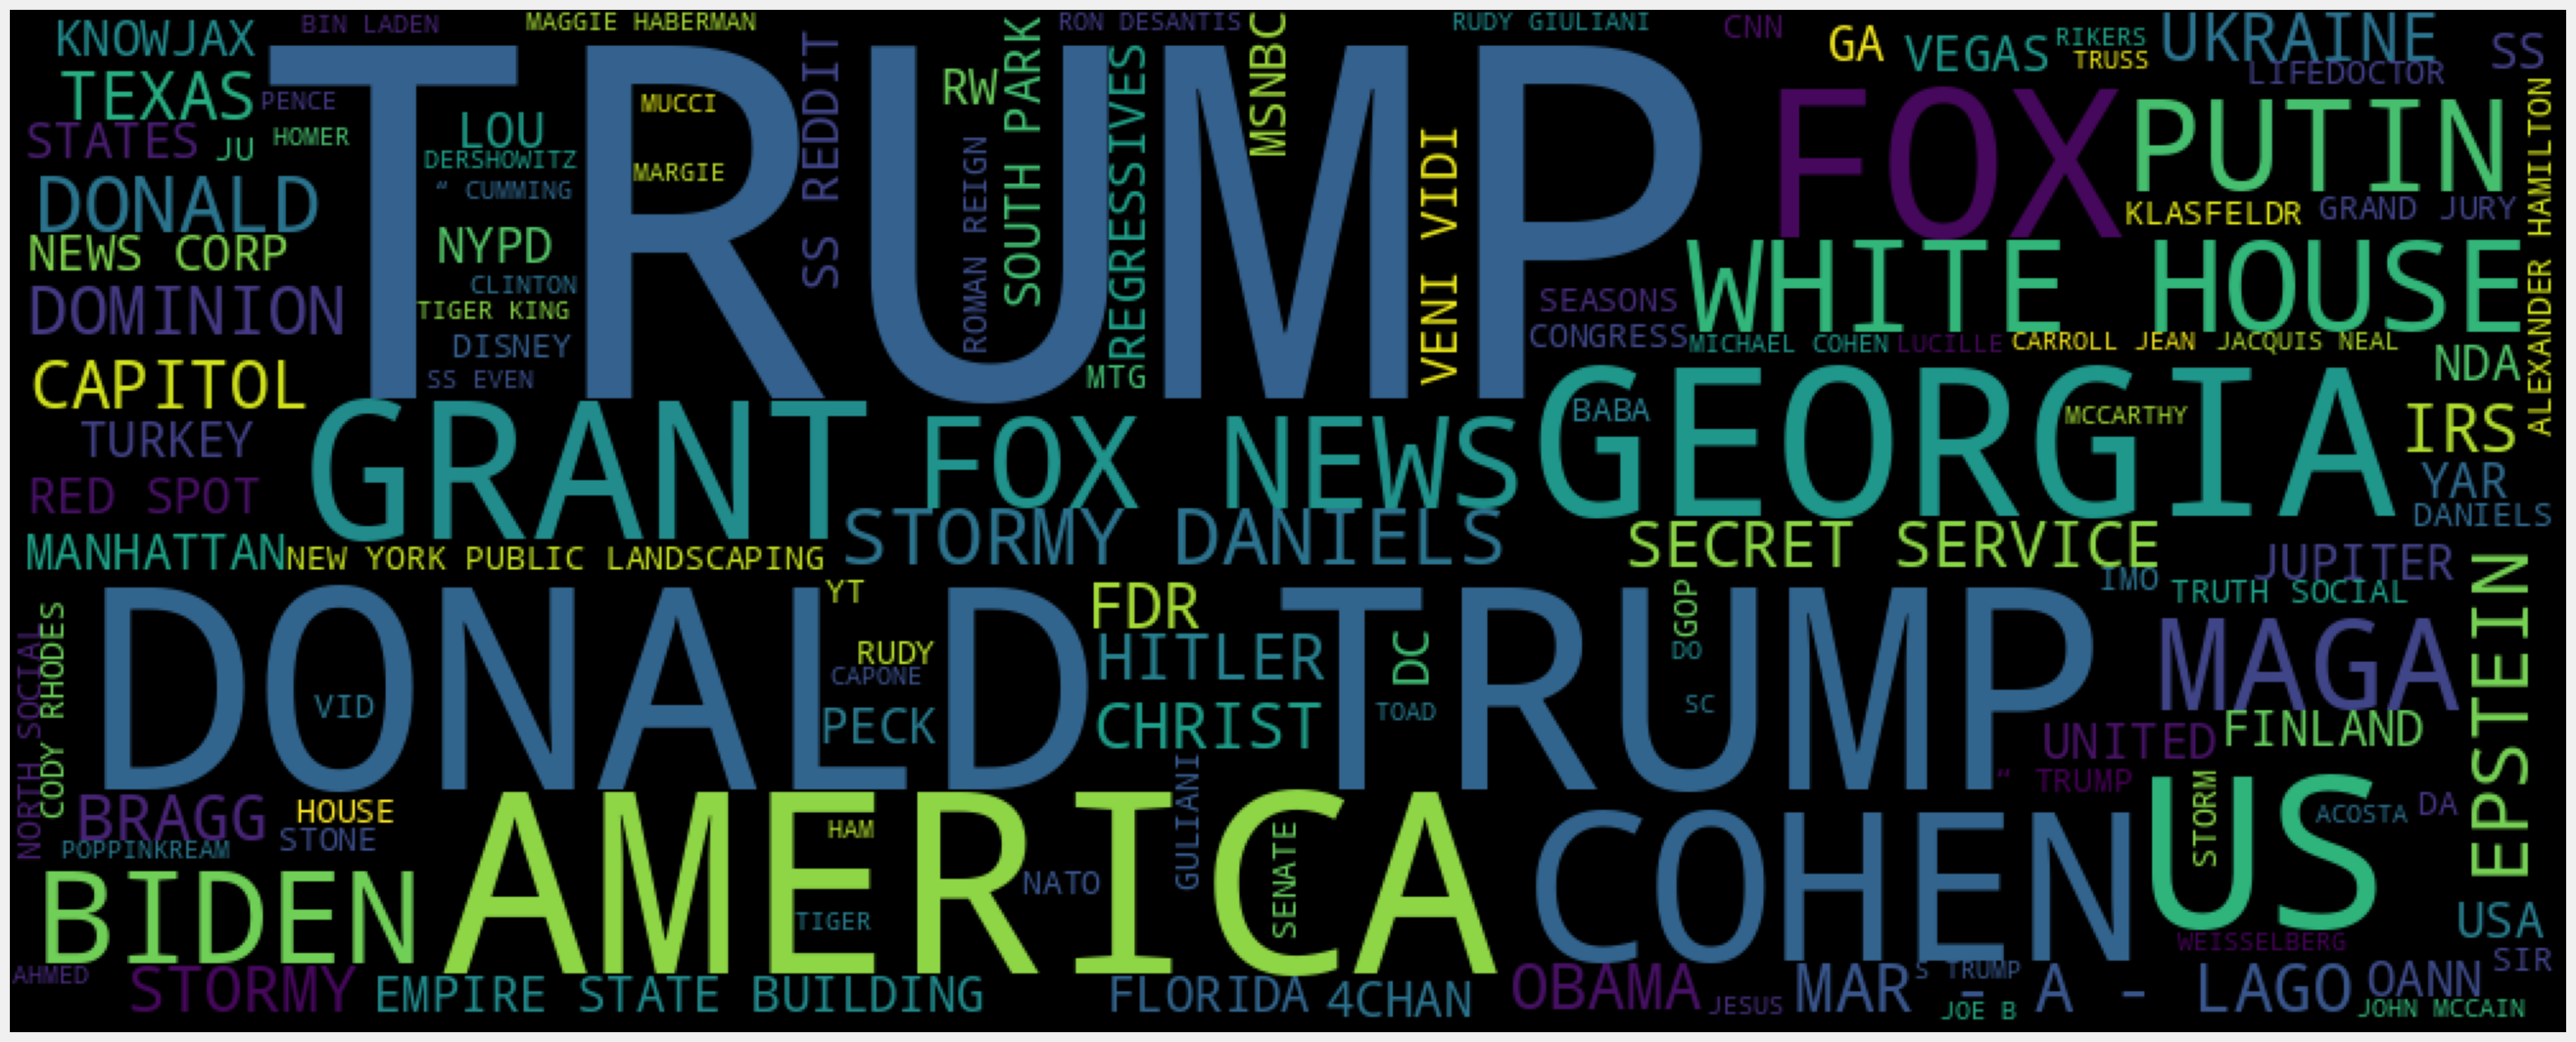

In [15]:
cloud = wordcloud.WordCloud(width=1000, height=400) #137
cloud.generate_from_frequencies(result_dict) #138
plt.figure( figsize= (30,15)) #139
plt.imshow(cloud) #140
plt.axis("off") #141
plt.show() #142

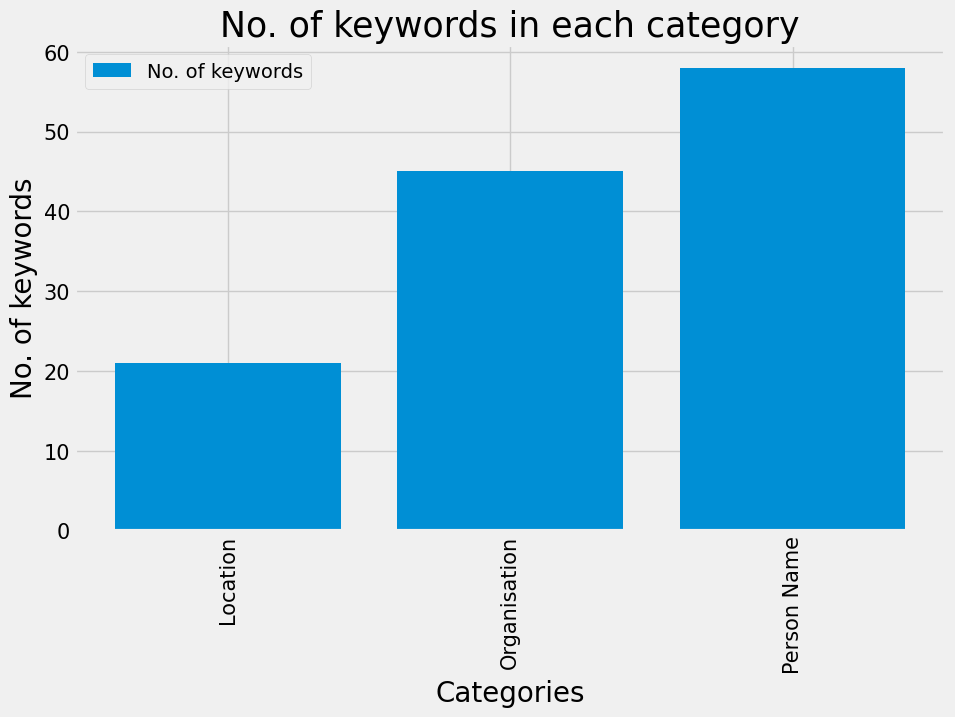

In [16]:
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC'])) #143
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG'])) #144
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER'])) #145

loc_list = list(print_dict['Location']) #146
org_list = list(print_dict['Organisation']) #147
per_list = list(print_dict['Person Name']) #148

temp_dict={} #149

temp_dict['Location']=len(loc_list) #150
temp_dict['Organisation']=len(org_list) #151
temp_dict['Person Name']=len(per_list) #152

k_words=['Location','Organisation','Person Name'] #153

width = 10 #154
height = 6 #155

x_axis = range(len(temp_dict)) #156
plt.style.use('fivethirtyeight') #157
plt.figure(figsize=(width,height)) #158

plt.bar(x_axis,list(temp_dict.values()),label="No. of keywords") #159
plt.xticks(x_axis,list(temp_dict.keys()), rotation=90, fontsize=15) #160
plt.yticks(fontsize=15) #161

plt.title("No. of keywords in each category",fontsize=25) #162
plt.xlabel("Categories",fontsize=20) #163
plt.ylabel("No. of keywords",fontsize=20) #164

plt.legend() #165

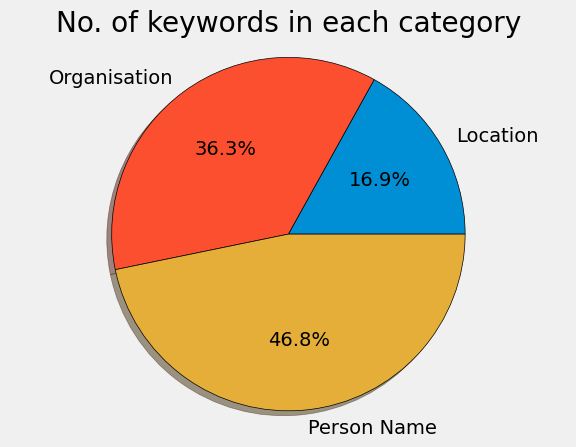

In [17]:
# Creating dataset 
rd=list(temp_dict.values()) #166

plt.pie(rd,labels=k_words,autopct='%1.1f%%',shadow=True,wedgeprops={'edgecolor': 'black'}) #167
plt.title('No. of keywords in each category') #168
plt.axis('equal') #169
plt.show() #170